In [15]:
import pandas as pd

# load csv to df
df = pd.read_csv('/home/locke/ManifoldRG/MultiNet/src/v0_2results/dataset_analysis_results.csv')
display(df.head(16))

,dataset,mean_shannon_entropy,mean_delentropy,gpt4o_macro_recall,gpt4_1_macro_recall,openvla_macro_recall,pi0_base_macro_recall,pi0_fast_macro_recall
0,bigfish,7.181736,11.584199,0.054076,0.107309,0.111799,0.098474,0.021755
1,bossfight,7.385991,13.014351,0.032695,0.067702,0.097256,0.069589,0.111771
2,caveflyer,2.444600,6.828392,0.042892,0.093763,0.101209,0.085061,0.060036
3,chaser,5.993356,11.591575,0.033745,0.115701,0.107188,0.098693,0.071241
4,climber,1.362235,4.343527,0.089290,0.112740,0.103991,0.083601,0.042227
5,coinrun,3.047974,8.506473,0.078521,0.108867,0.109655,0.096292,0.023583
6,dodgeball,5.255646,10.294045,0.050361,0.089868,0.098421,0.064053,0.040536
7,fruitbot,4.956744,9.900337,0.021250,0.094484,0.098065,0.069969,0.037527
8,heist,5.248903,10.992275,0.069493,0.108030,0.108518,0.078358,0.016160
9,jumper,2.978277,8.319020,0.100302,0.114033,0.117714,0.095701,0.031420


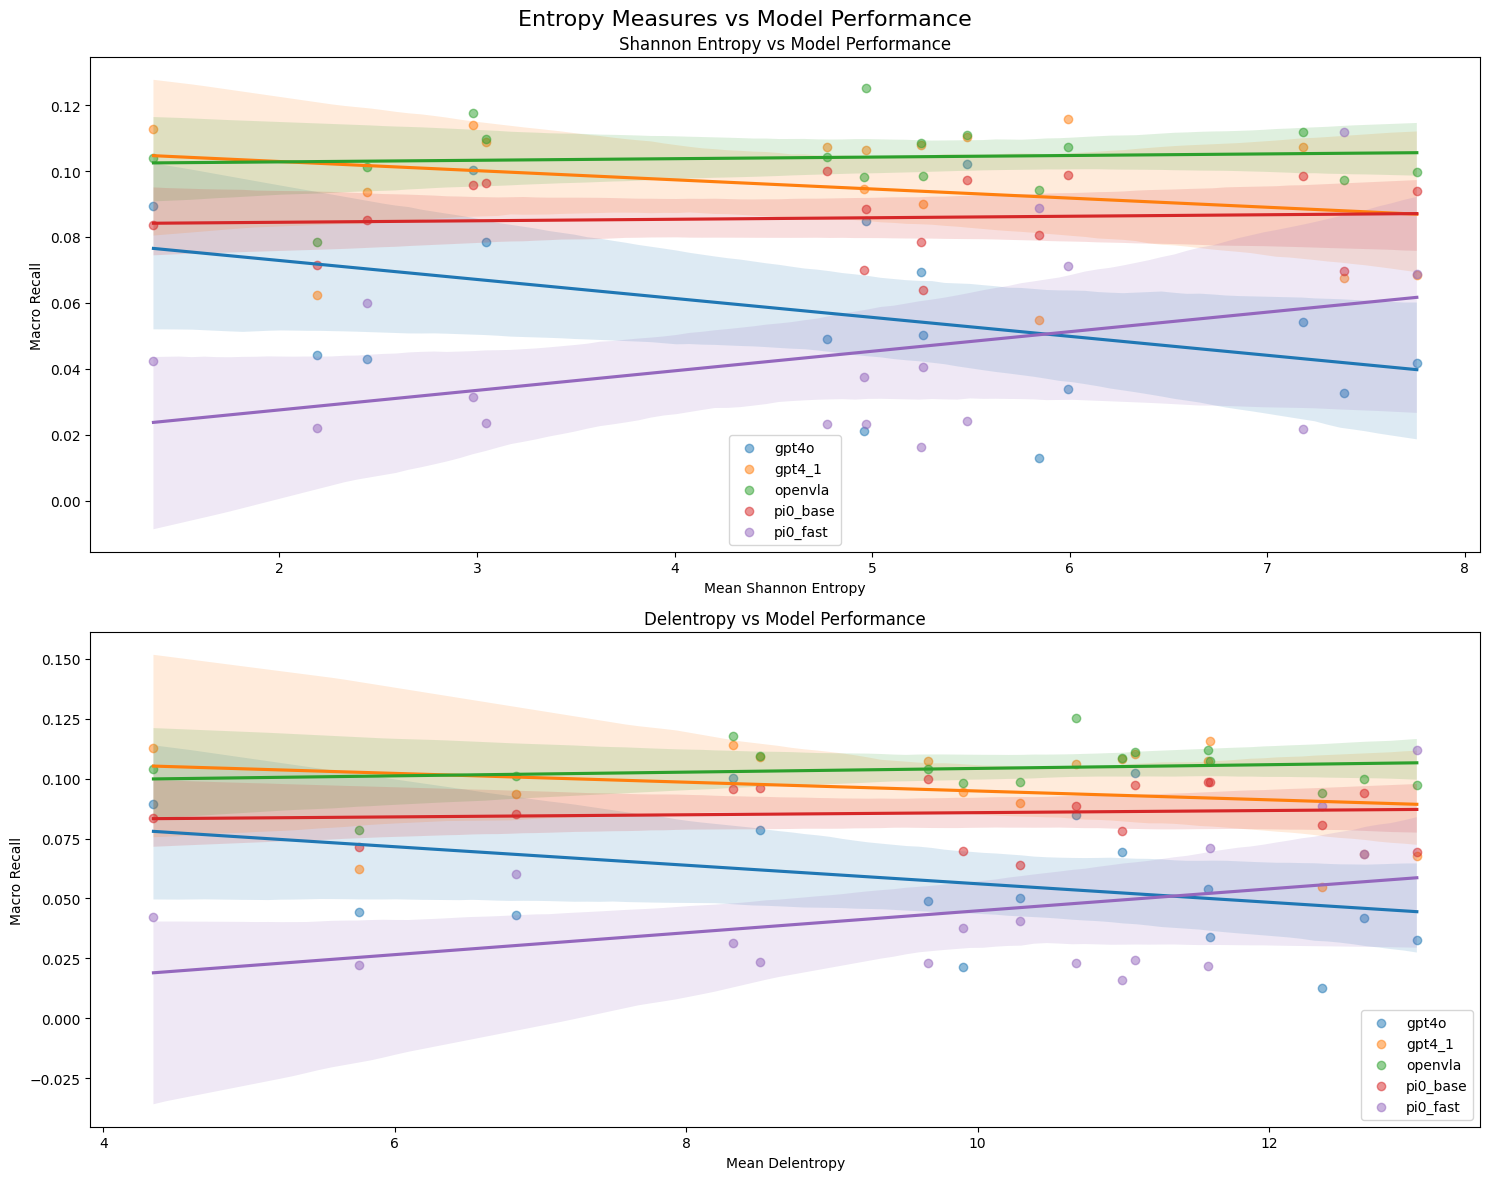

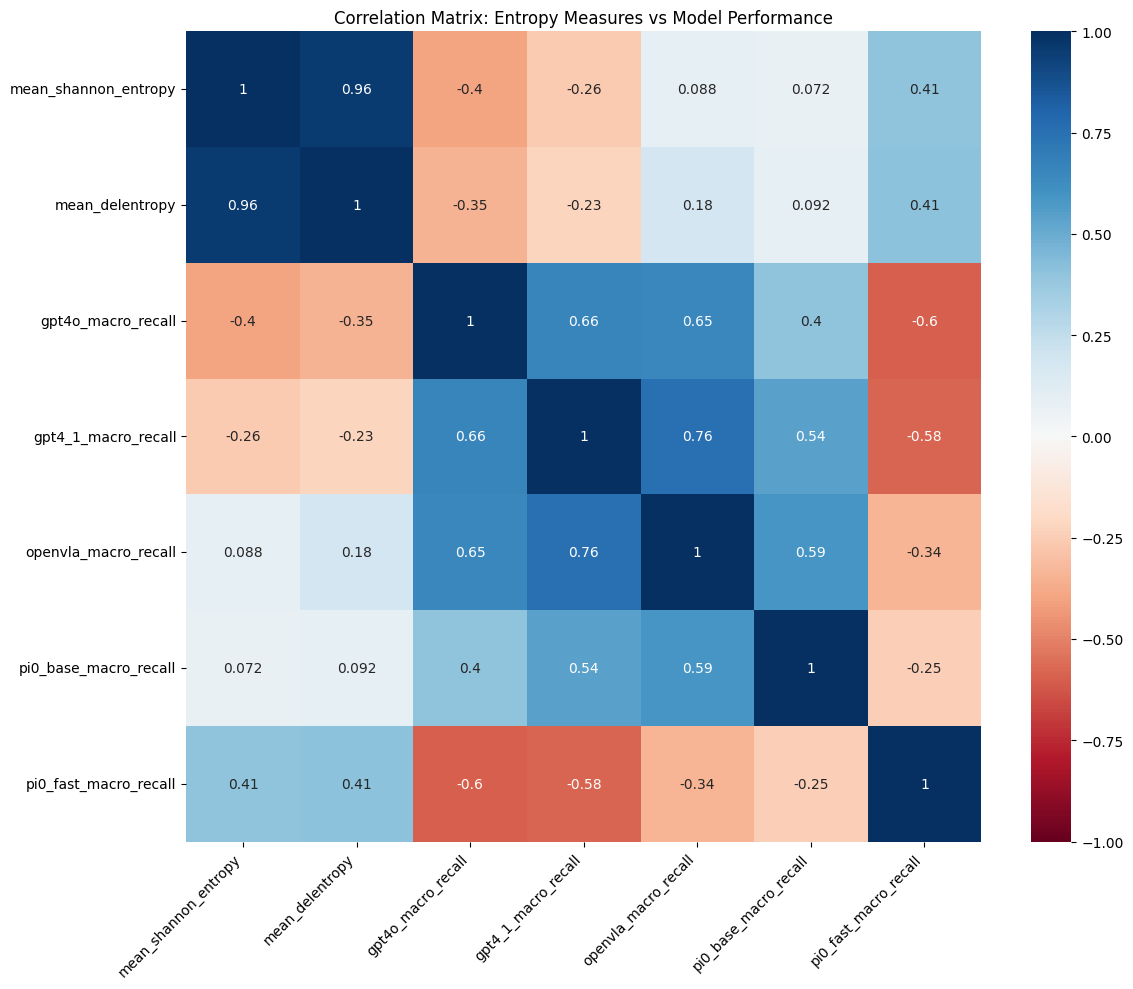


Correlations with entropy measures:

Shannon Entropy correlations:
gpt4o: -0.400
gpt4_1: -0.260
openvla: 0.088
pi0_base: 0.072
pi0_fast: 0.405

Delentropy correlations:
gpt4o: -0.351
gpt4_1: -0.225
openvla: 0.184
pi0_base: 0.092
pi0_fast: 0.408


In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# First, let's create scatter plots for both entropy measures against each model's performance
model_cols = ['gpt4o_macro_recall', 'gpt4_1_macro_recall', 'openvla_macro_recall', 
              'pi0_base_macro_recall', 'pi0_fast_macro_recall']

# Create a figure with two rows of subplots (one for Shannon entropy, one for delentropy)
fig, axes = plt.subplots(2, 1, figsize=(15, 12))
fig.suptitle('Entropy Measures vs Model Performance', fontsize=16)

# Plot for Shannon Entropy
for model in model_cols:
    sns.regplot(data=df, x='mean_shannon_entropy', y=model, 
                scatter_kws={'alpha':0.5}, 
                label=model.replace('_macro_recall', ''),
                ax=axes[0])
axes[0].set_title('Shannon Entropy vs Model Performance')
axes[0].set_xlabel('Mean Shannon Entropy')
axes[0].set_ylabel('Macro Recall')
axes[0].legend()

# Plot for Delentropy
for model in model_cols:
    sns.regplot(data=df, x='mean_delentropy', y=model, 
                scatter_kws={'alpha':0.5}, 
                label=model.replace('_macro_recall', ''),
                ax=axes[1])
axes[1].set_title('Delentropy vs Model Performance')
axes[1].set_xlabel('Mean Delentropy')
axes[1].set_ylabel('Macro Recall')
axes[1].legend()

plt.tight_layout()
plt.show()

# Now let's create a correlation matrix
correlation_cols = ['mean_shannon_entropy', 'mean_delentropy'] + model_cols
correlation_matrix = df[correlation_cols].corr()

# Plot correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', center=0, vmin=-1, vmax=1)
plt.title('Correlation Matrix: Entropy Measures vs Model Performance')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Print the correlations with entropy measures
print("\nCorrelations with entropy measures:")
print("\nShannon Entropy correlations:")
for model in model_cols:
    corr = correlation_matrix.loc['mean_shannon_entropy', model]
    print(f"{model.replace('_macro_recall', '')}: {corr:.3f}")

print("\nDelentropy correlations:")
for model in model_cols:
    corr = correlation_matrix.loc['mean_delentropy', model]
    print(f"{model.replace('_macro_recall', '')}: {corr:.3f}")